# The Spark Foundation


# Name - Mihir Sangani

# Task-2 Prediction using Unsupervised Machine Learning (From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.)

# Step 1: Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
from sklearn import datasets
from sklearn.cluster import KMeans
%matplotlib inline

# Step 2: Import Dataset

In [2]:
data=pd.read_csv("H:/corsera/iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Step 3: Find optimal number of clusters using the elbow method

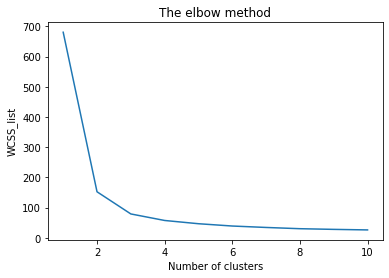

In [3]:
x = data.iloc[:,1:-1].values

wcss_list = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
    

mp.plot(range(1, 11), wcss_list)
mp.title('The elbow method')
mp.xlabel('Number of clusters')
mp.ylabel('WCSS_list') 
mp.show()

From above plow we can see that elbow point is at 3.So no of clusters will be 3

# Step 4: Training K-means algorithm

In [4]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_predict = kmeans.fit_predict(x)

# Step 4: Visualizing clusters

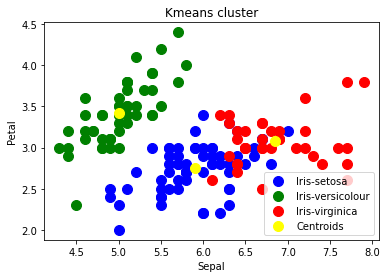

In [5]:
mp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
mp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], 
            s = 100, c = 'green', label = 'Iris-versicolour')
mp.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of the clusters
mp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

mp.title('Kmeans cluster')
mp.xlabel('Sepal')
mp.ylabel('Petal') 
mp.legend()